<a href="https://colab.research.google.com/github/sourcesync/kagglex_gemma/blob/gw%2Finitial/colab/sarah_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook demonstrates:
* web scraping via BeautifulSoup on challenging examples

# Install required packages

In [1]:
!pip install beautifulsoup4

# Import required packages

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pprint
import lxml.etree as etree

# Scrape challenging example from w-engines
* https://www.prydwen.gg/zenless/w-engines/

In [3]:
%%time

url = "https://www.prydwen.gg/zenless/w-engines/"

engines_request = requests.get(url)

soup = BeautifulSoup(engines_request.content, 'html.parser')

results = soup.find(id="___gatsby")

engine_elements = results.find_all("div", class_="zzz-engine")

print(len(engine_elements))

bs = BeautifulSoup(str(engine_elements[0]), 'xml')
pretty_xml = bs.prettify()
print(pretty_xml)

50
<?xml version="1.0" encoding="utf-8"?>
<div class="zzz-engine">
 <div class="zzz-engine-header">
  <div class="zzz-icon rarity-S">
   <div class="gatsby-image-wrapper gatsby-image-wrapper-constrained disable-transition" data-gatsby-image-wrapper="">
    <div style="max-width:256px;display:block">
     <img alt="" aria-hidden="true" role="presentation" src="data:image/svg+xml;charset=utf-8,%3Csvg height='256' width='256' xmlns='http://www.w3.org/2000/svg' version='1.1'%3E%3C/svg%3E" style="max-width:100%;display:block;position:static"/>
    </div>
    <div aria-hidden="true" data-placeholder-image="" style="opacity:1;transition:opacity 500ms linear;background-color:#080808;position:absolute;top:0;left:0;bottom:0;right:0"/>
    <picture>
     <source data-srcset="/static/1caa98f79cd184e88b1621ec66c0f794/8257c/Deep_Sea_Visitor.webp 64w,/static/1caa98f79cd184e88b1621ec66c0f794/6766a/Deep_Sea_Visitor.webp 128w,/static/1caa98f79cd184e88b1621ec66c0f794/22bfc/Deep_Sea_Visitor.webp 256w" siz

# Parse the Attribute and Value field for each engine

In [4]:
for engine in engine_elements:
  #print("engine=",engine)
  description = engine.select_one('div .zzz-engine-content')
  #print("description=", description)
  name = description.select_one('u')
  if not name: continue # Not sure why we need to check this (?)
  print(name.text)
  # get stats for this engine
  stats = engine.select_one('div .stats')
  critparent = stats.select_one('.stat:nth-child(2)') # 2nd div stat child seems most relevant
  #print("critparent=", critparent)
  attr = critparent.select_one('div .name')
  print("\tattr=", attr.text)
  val = critparent.select_one('div .value')
  print("\tvalue=", val.text)


Ice DMG
	attr= Crit Rate (Lv 60):
	value= 24%
Ether DMG
	attr= Crit Damage (Lv 60):
	value= 48%
Physical DMG
	attr= Anomaly Proficiency (Lv 60):
	value= 90
Physical DMG
	attr= Crit Rate (Lv 60):
	value= 24%
Ice DMG
	attr= Attack (Lv 60):
	value= 25%
Electric DMG
	attr= Impact (Lv 60):
	value= 15%
Electric DMG
	attr= Energy Regen (Lv 60):
	value= 50%
Physical DMG
	attr= Attack (Lv 60):
	value= 25%
Physical DMG
	attr= ATK (Lv 60):
	value= 25%
Ether DMG
	attr= Energy Regen (Lv 60):
	value= 50%


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="Gatsby 4.23.1" name="generator"/>
  <meta charset="utf-8" data-gatsby-head="true"/>
  <meta content="List of all Drive Disk Sets available in Zenless Zone Zero." data-gatsby-head="true" name="description"/>
  <meta content="Drive Disk Sets | Zenless Zone Zero | Prydwen Institute" data-gatsby-head="true" name="title"/>
  <meta content="website" data-gatsby-head="true" property="og:type"/>
  <meta content="https://www.prydwen.gg/zenless/disk-drives/" data-gatsby-head="true" property="og:url"/>
  <meta content="Drive Disk Sets | Zenless Zone Zero | Prydwen Institute" data-gatsby-head="true" property="og:title"/>
  <meta content="List of all Drive Disk Sets available in Zenless Zone Zero." data-gatsby-head="true" property="og:description"/>
  <meta content="https://www.pry
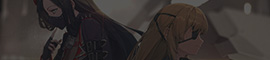
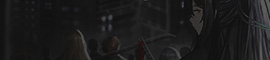
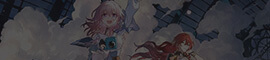
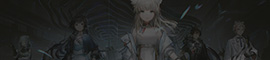
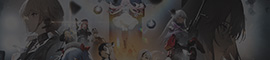
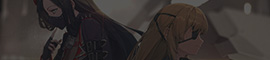
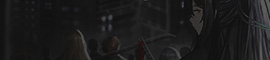
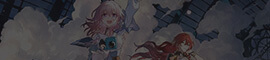
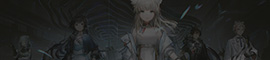
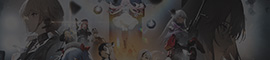
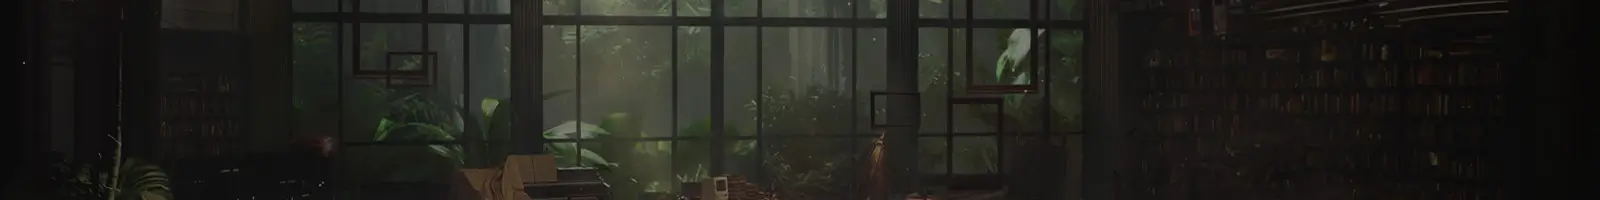
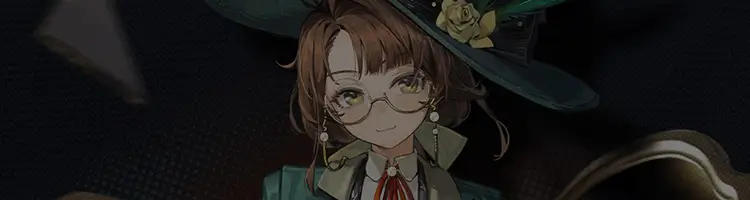
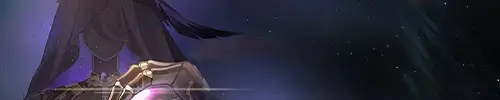
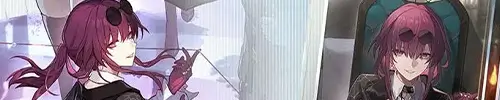
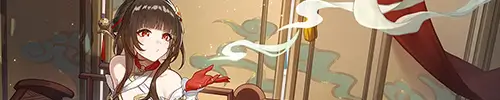
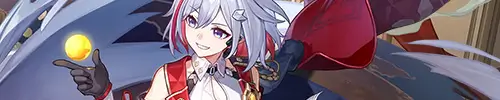
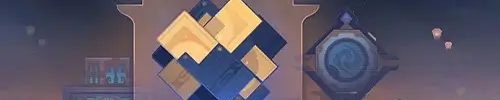
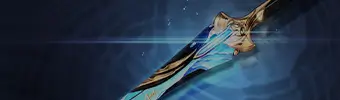
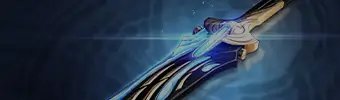
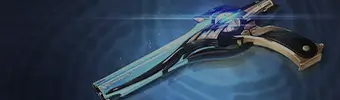
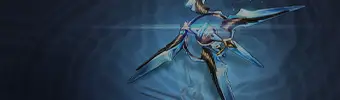
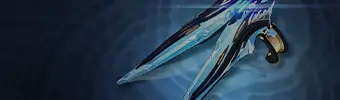
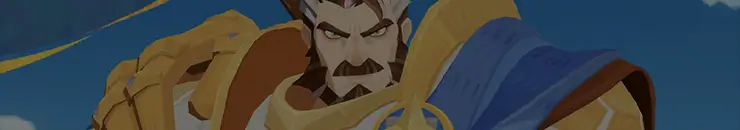
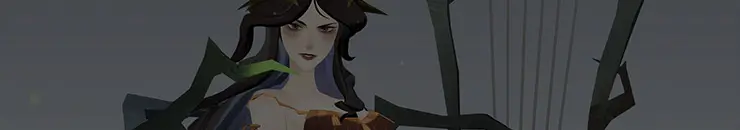
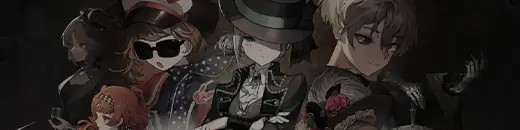
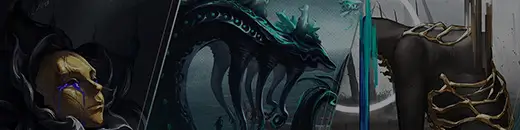
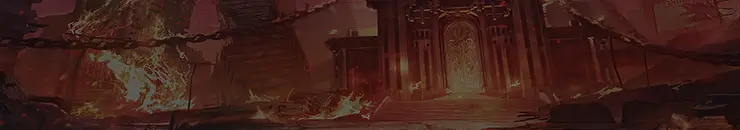
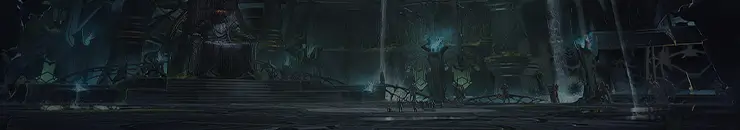
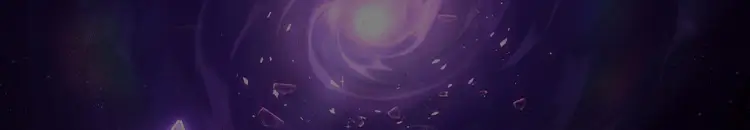
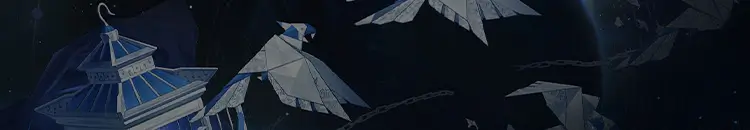
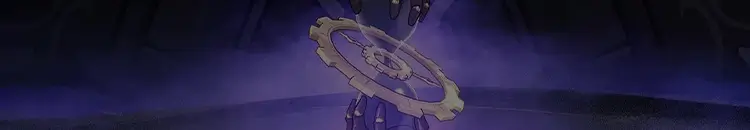
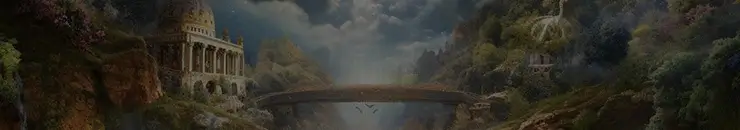
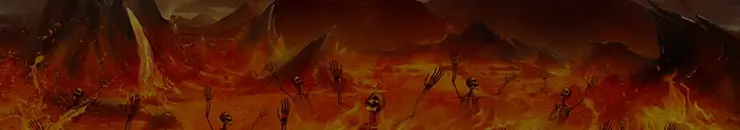
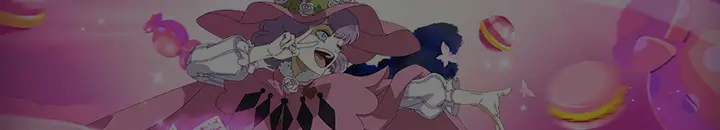
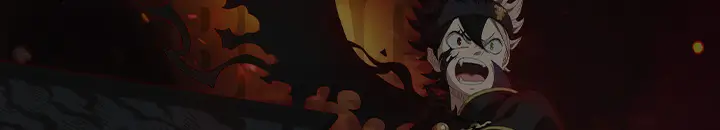
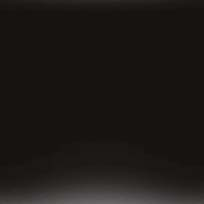
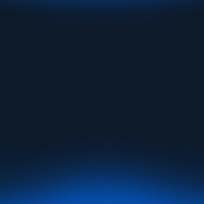
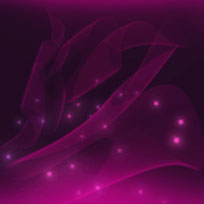
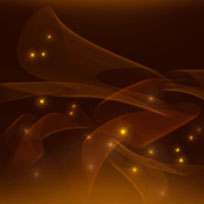
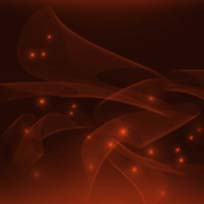
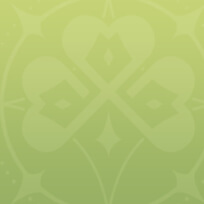
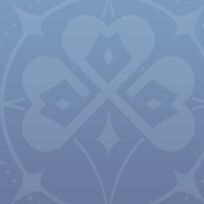
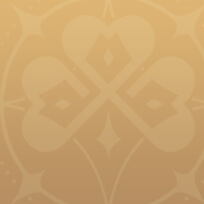
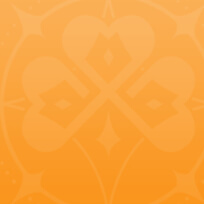
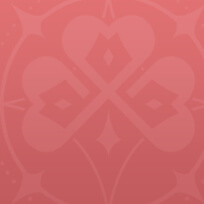
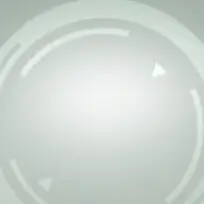
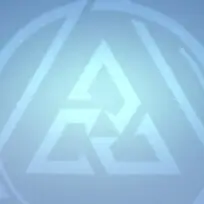
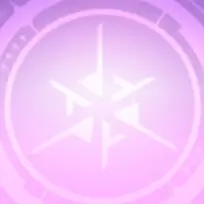
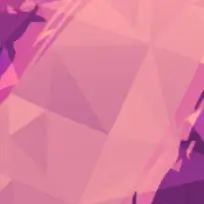
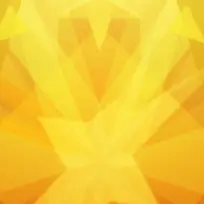

In [7]:
# Another challenging example
# Lets first get the full html of the site

url = "https://www.prydwen.gg/zenless/disk-drives"


engines_request = requests.get(url)

soup = BeautifulSoup(engines_request.content, 'html.parser')

pretty_xml = soup.prettify()

print(pretty_xml)

In [40]:
# Let's dive into the things we want from the html / xml above

# The parent node which contains everything
# ...
# <body>
#  <div id="___gatsby">
# ...
# Use beautiful soup to find that top-level parent
parent = soup.find(id="___gatsby")
#print("parent=", parent)


# The list of content appears to be contained in these tags
# ...
# <div class="col">
#         <div class="zzz-disk-set">
# ...
# Use CSS selector syntax to find those nodes under the parent node

disk_elements = parent.select("div .zzz-disk-set")
print("There are %d disk elements" % len(disk_elements))

# Now lets iterate those elements and extract what we need
for disk_element in disk_elements:

    # There identifying name appears to be in the zzz-info element under the disk_element parent
    # ...
    # <div class="zzz-disk-set">
    #       <div class="zzz-disk-header">
    # ...
    #        <div class="zzz-info">
    #         <h5>
    #          Chaos Jazz
    #         </h5>
    # Use CSS selector syntax to get that h5 element
    h5 = disk_element.select_one("h5")
    name = h5.text
    print("name=", name)

    # The attributes appear to be a list under the disk_element parent
    # ...
    # <div class="description">
    #          Anomaly Proficiency +
    #          <b>
    #           30
    #          </b>
    attributes = disk_element.select("div .description")
    print("\tnum_attributes=%d" % len(attributes))

    # Iterate attributes list and extract each attribute name and value
    for attr in attributes:

        # It appears the attribute and value are formatted slightly differently
        # hence the if-if-else below
        attr_name = attr.select_one("u")
        if attr_name:
          attr_value = attr.select_one("b")
          print("\t%s = %s" % (attr_name.text, attr_value.text))
          continue

        attr_name = attr.select_one("strong")
        if attr_name:
          attr_value = attr.select_one("b")
          print("\t%s = %s" % (attr_name.text, attr_value.text))
          continue

        else:
          child_nodes = list(attr.children)
          print("\t%s = %s" % (child_nodes[0], attr_value.text))


There are 14 disk elements
name= Chaos Jazz
	num_attributes=2
	Anomaly Proficiency + = 28%
	Fire DMG = 15%
name= Chaotic Metal
	num_attributes=2
	Ether DMG = 10%
	Corruption's = 20%
name= Fanged Metal
	num_attributes=2
	Physical DMG = 10%
	Assault = 35%
name= Freedom Blues
	num_attributes=2
	Anomaly Proficiency + = 35%
	When an EX Special Attack hits an enemy, reduce the targets Anomaly Buildup RES to equippers attribute by  = 35%
name= Hormone Punk
	num_attributes=2
	ATK + = 35%
	Upon entering combat or switching in, its user's ATK increased by  = 35%
name= Inferno Metal
	num_attributes=2
	Fire DMG = 10%
	Burning = 28%
name= Polar Metal
	num_attributes=2
	Ice DMG = 10%
	Freeze = 20%
name= Proto Punk
	num_attributes=2
	Shield Effect + = 20%
	When any squad member triggers a Defensive Assist or Evasive Assist, all squad members deal  = 20%
name= Puffer Electro
	num_attributes=2
	PEN Ratio + = 20%
	Ultimate DMG increases by  = 20%
name= Shockstar Disco
	num_attributes=2
	Impact + = 20%
	